## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/CDAC Project/sam1.csv")
df

,text,hindi,type
0,"Hi James,\n\nHave you claim your complimentary...","नमस्ते जेम्स,\n\nक्या आपने अभी तक अपने मानार्थ...",spam
1,"\nalt_text\nCongratulations, you just earned\n...","वैकल्पिक शब्द\nबधाई हो, आपने अभी-अभी कमाई की ह...",not spam
2,"Here's your GitHub launch code, @Mortyj420!\n ...","यह रहा आपका GitHub लॉन्च कोड, @Mortyj420!\n \n...",not spam
3,"Hello,\n \nThank you for contacting the Virtua...","नमस्ते,\n \nवर्चुअल रिवार्ड सेंटर से संपर्क कर...",not spam
4,"Hey Prachanda Rawal,\n\nToday's newsletter is ...","हे प्रचंड रावल,\n\nआज का न्यूज़लेटर आपके ब्लॉक...",spam
...,...,...,...
79,"Dear Maryam, \n\n \n\nI would like to thank yo...","प्रिय मरियम,\n\n \n\nमैं आपातकालीन विशेषज्ञ, म...",not spam
80,"Dear Customer,\n\nWelcome to Kilimall, Thanks ...","प्रिय ग्राहक,\n\nकिलिमॉल में आपका स्वागत है, ह...",not spam
81,"Dear vladis163rus,\nHere is the Steam Guard co...","प्रिय व्लादिस163रस,\nयहां स्टीम गार्ड कोड है ज...",not spam
82,View In Browser | Log in\n \n \n\nSkrill logo\...,ब्राउज़र में देखें | लॉग इन करें\n \n \n\nस्क्...,not spam


In [3]:
df.drop('text',axis=1,inplace=True)   #drop unnecessary columns
df

,hindi,type
0,"नमस्ते जेम्स,\n\nक्या आपने अभी तक अपने मानार्थ...",spam
1,"वैकल्पिक शब्द\nबधाई हो, आपने अभी-अभी कमाई की ह...",not spam
2,"यह रहा आपका GitHub लॉन्च कोड, @Mortyj420!\n \n...",not spam
3,"नमस्ते,\n \nवर्चुअल रिवार्ड सेंटर से संपर्क कर...",not spam
4,"हे प्रचंड रावल,\n\nआज का न्यूज़लेटर आपके ब्लॉक...",spam
...,...,...
79,"प्रिय मरियम,\n\n \n\nमैं आपातकालीन विशेषज्ञ, म...",not spam
80,"प्रिय ग्राहक,\n\nकिलिमॉल में आपका स्वागत है, ह...",not spam
81,"प्रिय व्लादिस163रस,\nयहां स्टीम गार्ड कोड है ज...",not spam
82,ब्राउज़र में देखें | लॉग इन करें\n \n \n\nस्क्...,not spam


In [4]:
X = df['hindi']

In [5]:
X.shape

(84,)

In [6]:
X.head()

0    नमस्ते जेम्स,\n\nक्या आपने अभी तक अपने मानार्थ...
1    वैकल्पिक शब्द\nबधाई हो, आपने अभी-अभी कमाई की ह...
2    यह रहा आपका GitHub लॉन्च कोड, @Mortyj420!\n \n...
3    नमस्ते,\n \nवर्चुअल रिवार्ड सेंटर से संपर्क कर...
4    हे प्रचंड रावल,\n\nआज का न्यूज़लेटर आपके ब्लॉक...
Name: hindi, dtype: object

In [7]:
y= df['type']

In [8]:
y.shape

(84,)

In [9]:
#import nltk library
import nltk

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
def hindi_tokenizer(text):
    words = nltk.word_tokenize(text,language='hindi',preserve_line=True)
    return words

In [12]:
tfidf = TfidfVectorizer(tokenizer=hindi_tokenizer)
X_vect = tfidf.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
X_vect.shape

(84, 3138)

In [14]:
X_vect.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0912213 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10099854, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
tfidf.get_feature_names_out()

array(['!', '#', '$', ..., '।', '\u200b\u200bहै', '•'], dtype=object)

## Train test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_vect,y, random_state=0)

In [18]:
X_train.shape, y_train.shape

((63, 3138), (63,))

In [19]:
X_test.shape , y_test.shape

((21, 3138), (21,))

## Build Model


## K-Means Clustering

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [21]:
num_clusters = 2  # Number of clusters (spam and not spam)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [23]:
# Calculate inertia for different values of K
inertia_values = []
possible_k_values = range(1, 11)
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia_values.append(kmeans.inertia_)

## K-Means Evaluation

In [24]:
# Method 1: Inertia (Within-Cluster Sum of Squares)
print("Inertia:", kmeans.inertia_)

Inertia: 43.21770296520967


In [25]:
# Method 2: Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_train, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.04314974569807381


## Naive Bayes

In [26]:
# Import Libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [28]:
X = df['hindi']
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Create TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [30]:
# Train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [32]:
# Predict on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

## Naive Bayes Evaluation

In [33]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.6471
Classification Report:
               precision    recall  f1-score   support

    not spam       0.65      1.00      0.79        11
        spam       0.00      0.00      0.00         6

    accuracy                           0.65        17
   macro avg       0.32      0.50      0.39        17
weighted avg       0.42      0.65      0.51        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVM

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
X = df['hindi']
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Create TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [42]:
# Create and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [43]:
# Predict using the SVM model
y_pred = svm_model.predict(X_test_tfidf)

## SVM Evaluation

In [44]:
# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report_hindidata = classification_report(y_test, y_pred)

In [45]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_hindidata)

Accuracy: 0.7058823529411765
Classification Report:
              precision    recall  f1-score   support

    not spam       0.69      1.00      0.81        11
        spam       1.00      0.17      0.29         6

    accuracy                           0.71        17
   macro avg       0.84      0.58      0.55        17
weighted avg       0.80      0.71      0.63        17



## Plot

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

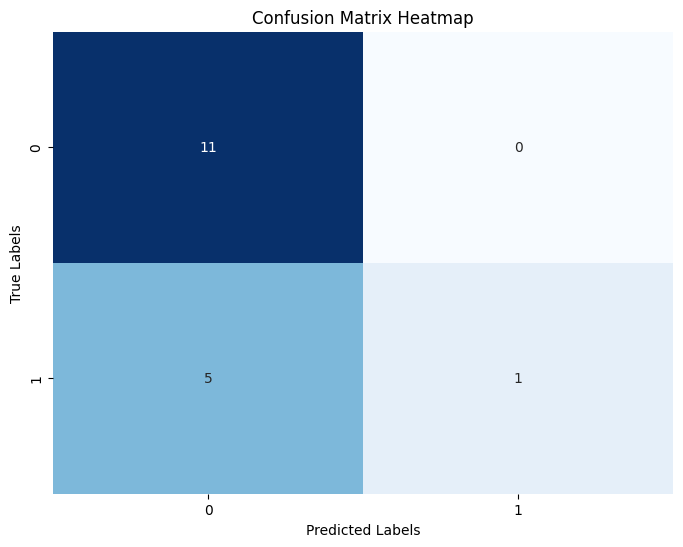

In [47]:
confusion_matrix_plot = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_plot, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [48]:
# Visualize the relationship between the features and labels
labels = df['type']
for label in set(labels):
    indices = (labels == label)
    plt.scatter(X[indices].toarray()[:, 0], [indices].toarray()[:, 1], label=label)
plt.xlabel('Feature 1 (TF-IDF)')
plt.ylabel('Feature 2 (TF-IDF)')
plt.legend()
plt.title('Relationship between Text Features and Labels')
plt.show()

AttributeError: ignored

## Deep Learning Approach

In [49]:
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.utils import to_categorical

In [50]:
# Preprocessing
df['hindi'] = df['hindi'].str.replace(r'\n', ' ')  # Remove newline characters

<ipython-input-50-2d5c1cbaa011>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['hindi'] = df['hindi'].str.replace(r'\n', ' ')  # Remove newline characters


In [51]:
X = df['hindi']
y = df['type']

In [52]:
# Split data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [53]:
X_train

12    भगवान ने आपके जीवन को प्रभावित करने के लिए बाइ...
32    प्रिय महोदय/महोदया  मैं कर्मचारियों के लिए यूआ...
16    त्वरित वेतन सर्वेक्षण®           नमस्ते एंगग्र...
64    प्रिय महोदय/महोदया  मुझे टीवी लाइसेंस से एसएमए...
37    आरई: जूनियर एडमिन असिस्टेंट  प्रिय नियुक्ति पे...
49    शुभ दिन  मैं समाधि स्थल के लिए एक कोटेशन के लि...
28    हाय रेहान     अभी साल आधा ही बीता है और हमने स...
2     यह रहा आपका GitHub लॉन्च कोड, @Mortyj420!   एक...
48    चल रहे मुद्रास्फीति के दबाव और शिलिंग के निरंत...
4     हे प्रचंड रावल,  आज का न्यूज़लेटर आपके ब्लॉकबस...
0     नमस्ते जेम्स,  क्या आपने अभी तक अपने मानार्थ उ...
55    एसएफआई की ओर से शुभकामनाएँ... आइए कुछ बेहतरीन ...
80    प्रिय ग्राहक,  किलिमॉल में आपका स्वागत है, हमस...
36    प्रिय श्री उज़ोचुकु जोसेफ एज़े,  जून 2023 के ल...
26    नमस्ते सत्या,  आपको को-डीओ समुदाय के लिए एक वी...
58    जॉबस्ट्रीट.कॉम  हाय एंगग्रेनी, हमारे पास आपके ...
10    शुभ दिन सर/मैडम   2020 में मैंने संस्थान में आ...
54    स्नैपचैट+ ग्राहक के रूप में, अब आपके पास व

In [54]:
X_train.shape,y_train.shape

((58,), (58,))

In [55]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [56]:
len(tokenizer.word_index)

2335

In [57]:
# Padding
max_sequence_length = max([len(seq) for seq in train_sequences + test_sequences])

train_padded_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [58]:
# Convert labels to categorical
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = label_encoder.transform(y_test)
y_test_encoded = to_categorical(y_test_encoded)

## RNN

In [59]:
# RNN Model Building
model = Sequential()

model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))

model.add(SimpleRNN(128))

model.add(Dense(10, activation='relu'))

model.add(Dense(y_train_encoded.shape[1], activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1260, 100)         233600    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               29312     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 264,224
Trainable params: 264,224
Non-trainable params: 0
_________________________________________________________________


In [61]:
#Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [62]:
#Train the model
history = model.fit(train_padded_sequences, y_train_encoded, epochs=10, batch_size=32, validation_data=(test_padded_sequences, y_test_encoded),verbose=1)

Epoch 1/10
2/2 [==============================] - 11s 2s/step - loss: 0.7040 - accuracy: 0.3621 - val_loss: 0.7023 - val_accuracy: 0.3846
Epoch 2/10
2/2 [==============================] - 5s 3s/step - loss: 0.6501 - accuracy: 0.7414 - val_loss: 0.6823 - val_accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 5s 2s/step - loss: 0.5829 - accuracy: 0.9310 - val_loss: 0.6722 - val_accuracy: 0.6154
Epoch 4/10
2/2 [==============================] - 3s 2s/step - loss: 0.5508 - accuracy: 0.8793 - val_loss: 0.6969 - val_accuracy: 0.4231
Epoch 5/10
2/2 [==============================] - 4s 2s/step - loss: 0.5039 - accuracy: 0.9483 - val_loss: 0.6950 - val_accuracy: 0.4615
Epoch 6/10
2/2 [==============================] - 5s 2s/step - loss: 0.4414 - accuracy: 1.0000 - val_loss: 0.6689 - val_accuracy: 0.6538
Epoch 7/10
2/2 [==============================] - 4s 2s/step - loss: 0.3942 - accuracy: 1.0000 - val_loss: 0.6531 - val_accuracy: 0.6538
Epoch 8/10
2/2 [========================

## Evaluate Simple RNN

In [63]:
# Evaluate the model
loss, accuracy = model.evaluate(test_padded_sequences, y_test_encoded)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

1/1 [==============================] - 0s 125ms/step - loss: 0.6507 - accuracy: 0.6923
Test Loss: 0.6507, Test Accuracy: 0.6923


## Plot

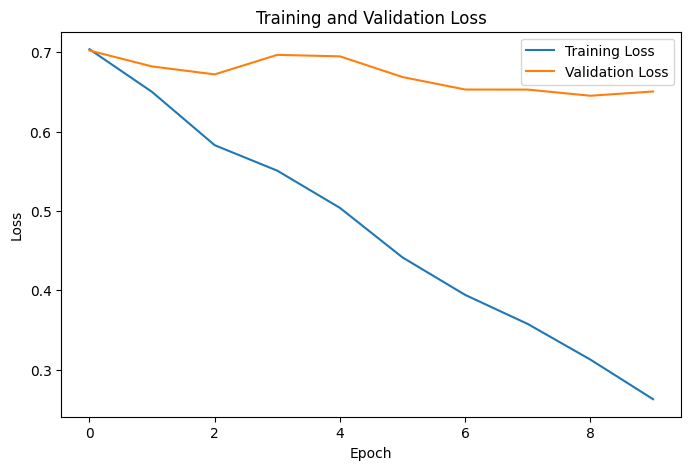

In [64]:
# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

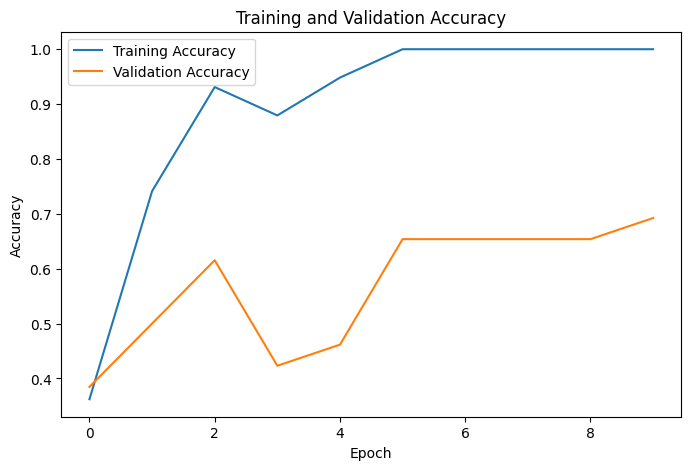

In [65]:
# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

## LSTM

In [66]:
from keras.layers import LSTM

In [67]:
#Building LSTM Model
lstm_model = Sequential()

lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))

lstm_model.add(LSTM(128))

lstm_model.add(Dense(10, activation='relu'))

lstm_model.add(Dense(y_train_encoded.shape[1], activation='sigmoid'))

In [68]:
# Compile LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
# Train the LSTM model
lstm_history = lstm_model.fit(train_padded_sequences, y_train_encoded, validation_data=(test_padded_sequences, y_test_encoded), epochs=10, batch_size=32)

Epoch 1/10
2/2 [==============================] - 5s 843ms/step - loss: 0.6912 - accuracy: 0.7241 - val_loss: 0.6896 - val_accuracy: 0.6154
Epoch 2/10
2/2 [==============================] - 1s 341ms/step - loss: 0.6810 - accuracy: 0.7241 - val_loss: 0.6848 - val_accuracy: 0.6154
Epoch 3/10
2/2 [==============================] - 1s 345ms/step - loss: 0.6674 - accuracy: 0.7241 - val_loss: 0.6769 - val_accuracy: 0.6154
Epoch 4/10
2/2 [==============================] - 1s 334ms/step - loss: 0.6400 - accuracy: 0.7414 - val_loss: 0.6631 - val_accuracy: 0.6154
Epoch 5/10
2/2 [==============================] - 1s 362ms/step - loss: 0.5948 - accuracy: 0.7586 - val_loss: 0.6667 - val_accuracy: 0.6154
Epoch 6/10
2/2 [==============================] - 1s 498ms/step - loss: 0.5156 - accuracy: 0.7586 - val_loss: 0.7293 - val_accuracy: 0.6154
Epoch 7/10
2/2 [==============================] - 1s 521ms/step - loss: 0.5032 - accuracy: 0.7586 - val_loss: 0.6515 - val_accuracy: 0.6154
Epoch 8/10
2/2 [====

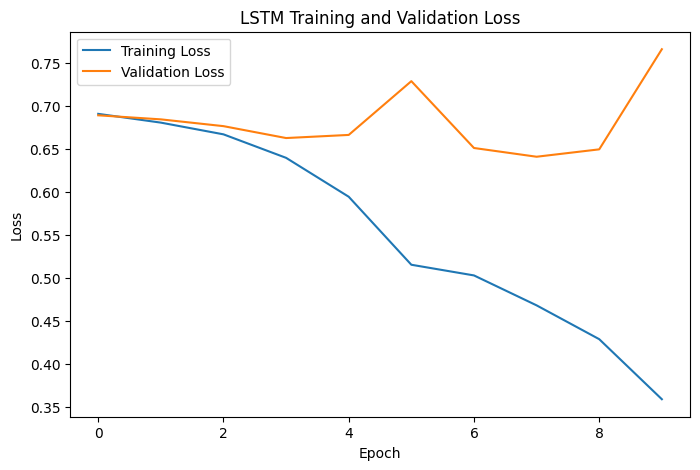

In [70]:
# Plot loss and accuracy for LSTM
plt.figure(figsize=(8, 5))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()

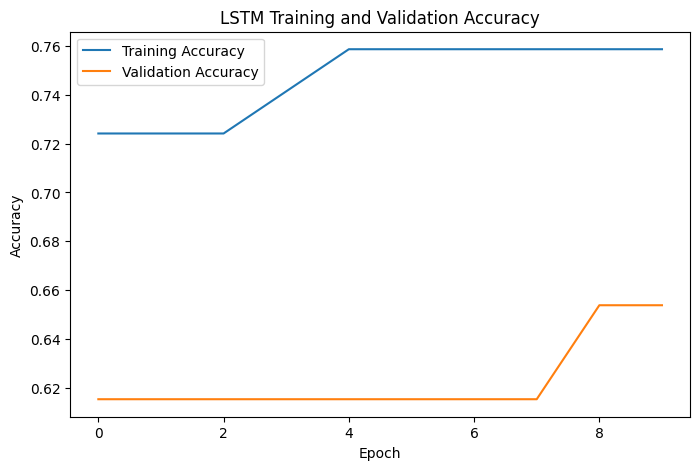

In [71]:
plt.figure(figsize=(8,5))
plt.plot(lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.legend()

## GRU

In [72]:
from keras.layers import GRU

In [73]:
# Building GRU Model
gru_model = Sequential()

gru_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))

gru_model.add(GRU(128))

gru_model.add(Dense(10, activation='relu'))

gru_model.add(Dense(y_train_encoded.shape[1], activation='sigmoid'))

In [74]:
#Compile GRU Model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
#Train the GRU model
gru_history = gru_model.fit(train_padded_sequences, y_train_encoded, validation_data=(test_padded_sequences, y_test_encoded), epochs=10, batch_size=32)

Epoch 1/10
2/2 [==============================] - 4s 788ms/step - loss: 0.6912 - accuracy: 0.5517 - val_loss: 0.6888 - val_accuracy: 0.6154
Epoch 2/10
2/2 [==============================] - 1s 369ms/step - loss: 0.6788 - accuracy: 0.7241 - val_loss: 0.6851 - val_accuracy: 0.6154
Epoch 3/10
2/2 [==============================] - 1s 433ms/step - loss: 0.6630 - accuracy: 0.7241 - val_loss: 0.6804 - val_accuracy: 0.6154
Epoch 4/10
2/2 [==============================] - 1s 523ms/step - loss: 0.6439 - accuracy: 0.7241 - val_loss: 0.6743 - val_accuracy: 0.6154
Epoch 5/10
2/2 [==============================] - 1s 498ms/step - loss: 0.6207 - accuracy: 0.7241 - val_loss: 0.6671 - val_accuracy: 0.6154
Epoch 6/10
2/2 [==============================] - 1s 505ms/step - loss: 0.5883 - accuracy: 0.7241 - val_loss: 0.6609 - val_accuracy: 0.6154
Epoch 7/10
2/2 [==============================] - 1s 537ms/step - loss: 0.5458 - accuracy: 0.7241 - val_loss: 0.6616 - val_accuracy: 0.6154
Epoch 8/10
2/2 [====

## Plot

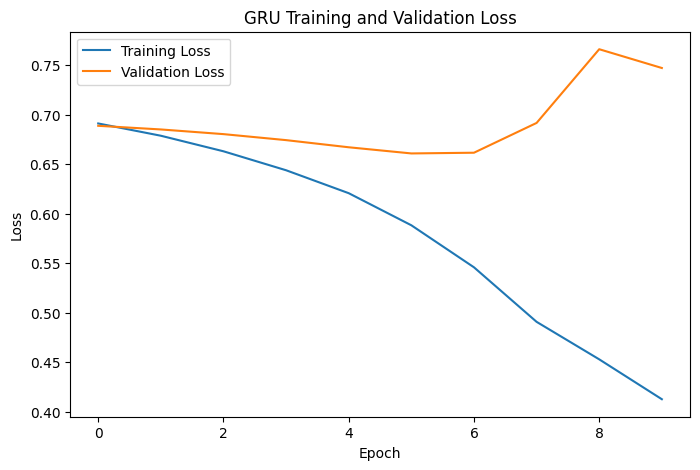

In [76]:
# Plot loss and accuracy for GRU
plt.figure(figsize=(8, 5))
plt.plot(gru_history.history['loss'], label='Training Loss')
plt.plot(gru_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GRU Training and Validation Loss')
plt.legend()
plt.show()

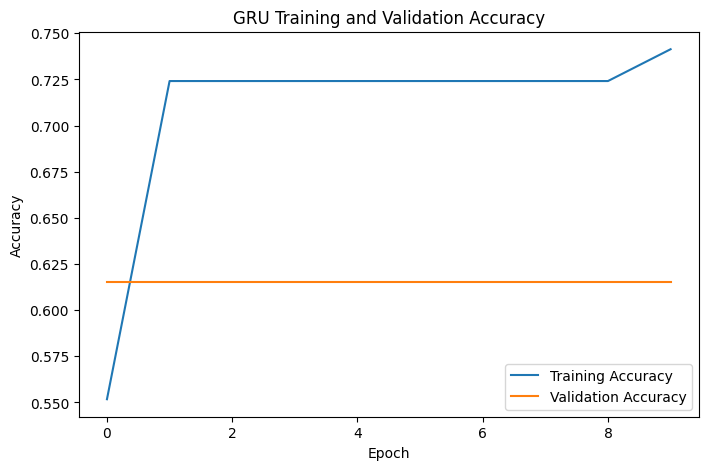

In [77]:
plt.figure(figsize=(8,5))
plt.plot(gru_history.history['accuracy'], label='Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('GRU Training and Validation Accuracy')
plt.legend()
plt.show()